In [69]:
import sys
sys.path.append("../src/utils")
from utils import read_raw_network_data
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data, _ = read_raw_network_data("T1330", depth=1)

In [7]:
data.keys()

dict_keys(['lines_static_data', 'nodes_static_data', 'SMM_measurements', 'TP_measurements'])

In [81]:
data_nodes = data["nodes_static_data"].drop(columns=["Unnamed: 0"])
data_nodes["x_y"] = list(zip(data_nodes["x"], data_nodes["y"]))
data_nodes["lon_lat"] = list(zip(data_nodes["lon"], data_nodes["lat"]))
data_nodes = data_nodes.drop(columns=["x", "y", "lon", "lat"])
data_edges = data["lines_static_data"].drop(columns=["Unnamed: 0"])

In [82]:
data_nodes.head()

,aclass_id,bus,smm,prikljucna_moc_odjem,prikljucna_moc_oddaja,x_y,lon_lat
0,junction,97327,NaN,NaN,NaN,"(530588.0843000002, 153821.05189999938)","(21.48883237280564, 49.25298769476685)"
1,PMO,55363,110471.0,35.0,0.0,"(530715.1489000004, 154094.69480000064)","(21.490457517273, 49.25545698477883)"
2,PMO,55364,91558.0,17.0,14.0,"(530714.4113999996, 153845.96270000003)","(21.49046867801605, 49.25321912788421)"
3,PMO,55367,30234.0,14.0,0.0,"(530699.8213, 153848.67300000042)","(21.490279227137176, 49.25324266867607)"
4,PMO,55368,30233.0,14.0,0.0,"(530683.6710999999, 153849.89320000075)","(21.49006966676341, 49.25325271264873)"


In [83]:
data_edges.head()

,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,max_i_ka,type,d_mm2,coords,coords_transformed
0,55579,96697,0.055,0.533,0.079,0.176,cs,70.0,"[[530374.6612999998, 153999.8621999994], [5303...","[[21.486049387812564, 49.254584020619056], [21..."
1,55593,96697,0.037,0.533,0.079,0.176,cs,70.0,"[[530337.4517000001, 154015.33029999956], [530...","[[21.485565488389135, 49.2547210147785], [21.4..."
2,55615,96697,0.038,1.040,0.081,0.120,cs,35.0,"[[530337.4517000001, 154015.33029999956], [530...","[[21.485565488389135, 49.2547210147785], [21.4..."
3,55615,55625,0.035,0.627,0.081,0.159,cs,35.0,"[[530331.6523000002, 154036.7006000001], [5303...","[[21.48548847348933, 49.25491294229187], [21.4..."
4,55363,93670,0.144,0.533,0.079,0.176,cs,70.0,"[[530715.1489000004, 154094.69480000064], [530...","[[21.490457517273, 49.25545698477883], [21.490..."


In [84]:
# print bus that are not unique from data_nodes 
data_nodes[data_nodes.duplicated(subset=["bus"], keep=False)].head()

,aclass_id,bus,smm,prikljucna_moc_odjem,prikljucna_moc_oddaja,x_y,lon_lat
9,PMO,55372,121932.0,17.0,0.0,"(530658.6579, 153753.64279999956)","(21.48975329116156, 49.25238531130118)"
10,PMO,55372,123237.0,17.0,0.0,"(530658.6579, 153753.64279999956)","(21.48975329116156, 49.25238531130118)"
12,PMO,55380,86650.0,83.0,0.0,"(530626.7094, 153816.95390000008)","(21.48933365752437, 49.25295306413992)"
13,PMO,55380,30230.0,17.0,0.0,"(530626.7094, 153816.95390000008)","(21.48933365752437, 49.25295306413992)"
16,PMO,55387,114592.0,14.0,0.0,"(530617.4486999996, 154130.01669999957)","(21.489187401360358, 49.25576911726745)"


In [85]:
#each bus can have multiple smms so we have to agregate data for each bus

In [107]:
data_nodes_aggr = data_nodes.groupby(["bus", "aclass_id"]).agg(list)
data_nodes_aggr["x_y"] = data_nodes_aggr["x_y"].apply(lambda x: x[0])
data_nodes_aggr["lon_lat"] = data_nodes_aggr["lon_lat"].apply(lambda x: x[0])
data_nodes_aggr = data_nodes_aggr.reset_index()
data_nodes_aggr[20:25]

,bus,aclass_id,smm,prikljucna_moc_odjem,prikljucna_moc_oddaja,x_y,lon_lat
20,55385,PMO,[108966.0],[17.0],[13.0],"(530619.0462999996, 154048.6559999995)","(21.489214918618764, 49.25503721720759)"
21,55386,PMO,[nan],[nan],[nan],"(530617.4691000003, 153810.67400000058)","(21.489214341434828, 49.25289602925062)"
22,55387,PMO,"[114592.0, 114593.0, 114596.0]","[14.0, 14.0, 14.0]","[0.0, 0.0, 0.0]","(530617.4486999996, 154130.01669999957)","(21.489187401360358, 49.25576911726745)"
23,55390,PMO,[122711.0],[17.0],[0.0],"(530610.9187000003, 154131.54690000042)","(21.489102579360637, 49.25578250586195)"
24,55391,PMO,[115604.0],[14.0],[11.0],"(530610.7186000003, 154130.61690000072)","(21.48910006176604, 49.25577412716477)"


In [140]:
print(len(data_nodes_aggr))
print(len(data_nodes_aggr["bus"].unique()))
#print distinct nodes from data eges columns from_bus and to_bus
print(len(set(data_edges["from_bus"].unique().tolist() + data_edges["to_bus"].unique().tolist())))

115
115
127


[530374.6612999998, 153999.8621999994]
[530375.4417000003, 153999.38949999958]
[530373.0016000001, 153994.18950000033]
[530372.2015000004, 153992.4894999992]
[530370.9615000002, 153994.4196000006]
[530359.2016000003, 154001.42980000004]
[530348.8115999997, 154006.73000000045]
[530339.6316, 154011.07019999996]
[530336.3517000005, 154013.90029999986]
[530337.4517000001, 154015.33029999956]
[530342.2120000003, 154022.7402999997]
[530344.4823000003, 154030.8103]
[530346.9824000001, 154033.0603]
[530348.6323999995, 154032.85029999912]
[530358.5023999996, 154029.4001000002]
[530358.6723999996, 154029.82010000013]
[530337.4517000001, 154015.33029999956]
[530336.2616999997, 154013.98029999994]
[530333.9017000003, 154014.8604000006]
[530329.0717000002, 154018.28050000034]
[530327.3618000001, 154020.71050000004]
[530326.0017999997, 154021.65049999952]
[530324.9719000002, 154024.19060000032]
[530324.9619000005, 154024.66059999913]
[530325.0318999998, 154024.91059999913]
[530325.3019000003, 154026

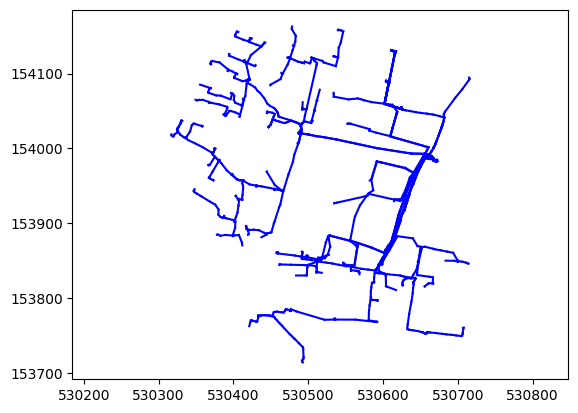

In [156]:
for row in data_edges.iterrows():
    coords = row[1]["coords"]
    #transform string to list of tuples
    coords = eval(coords)
    for i in range(len(coords)-1):
        x0, y0 = coords[i]
        x1, y1 = coords[i+1]
        plt.plot([x0, x1], [y0, y1], "b")
#show plot with equal axis dimensions
plt.axis("equal")
plt.show()

In [121]:
data_nodes_aggr_dict = data_nodes_aggr.set_index("bus").to_dict(orient="index")
data_nodes_aggr_dict

{243: {'aclass_id': 'TR',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': (530670.5350000001, 153984.6645999998),
  'lon_lat': (21.489888056885366, 49.254464475525744)},
 2859: {'aclass_id': 'RO',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': (530624.3164999997, 154054.6559999995),
  'lon_lat': (21.48928277111593, 49.25509150386318)},
 2860: {'aclass_id': 'RO',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': (530614.5626999997, 153929.52500000037),
  'lon_lat': (21.48916671919818, 49.25396514965445)},
 2861: {'aclass_id': 'RO',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': (530582.3731000004, 153957.00579999946),
  'lon_lat': (21.488746936005448, 49.2542105251013)},
 2862: {'aclass_id': 'RO',
  'smm': [nan],
  'prikljucna_moc_odjem': [nan],
  'prikljucna_moc_oddaja': [nan],
  'x_y': (530534.8115999997, 153926

In [122]:
#create undirected networkx graph from data_nodes and data_edges
G = nx.from_pandas_edgelist(data_edges, source="from_bus", target="to_bus", edge_attr=True)
#set node attributes from data_nodes_aggr_dict
nx.set_node_attributes(G, data_nodes_aggr_dict)


In [125]:
G.nodes(data=True)

NodeDataView({55579: {'aclass_id': 'PMO', 'smm': [30461.0], 'prikljucna_moc_odjem': [14.0], 'prikljucna_moc_oddaja': [0.0], 'x_y': (530374.6612999998, 153999.8621999994), 'lon_lat': (21.486049387812564, 49.254584020619056)}, 96697: {'aclass_id': 'junction', 'smm': [nan], 'prikljucna_moc_odjem': [nan], 'prikljucna_moc_oddaja': [nan], 'x_y': (530337.4517000001, 154015.33029999956), 'lon_lat': (21.48556548838913, 49.2547210147785)}, 55593: {'aclass_id': 'PMO', 'smm': [30462.0], 'prikljucna_moc_odjem': [17.0], 'prikljucna_moc_oddaja': [10.0], 'x_y': (530357.4424, 154030.35009999946), 'lon_lat': (21.48582349988177, 49.25485731241911)}, 55615: {'aclass_id': 'PMO', 'smm': [30493.0], 'prikljucna_moc_odjem': [14.0], 'prikljucna_moc_oddaja': [0.0], 'x_y': (530331.6523000002, 154036.7006000001), 'lon_lat': (21.48548847348933, 49.25491294229187)}, 55625: {'aclass_id': 'PMO', 'smm': [30464.0], 'prikljucna_moc_odjem': [17.0], 'prikljucna_moc_oddaja': [0.0], 'x_y': (530317.2416000003, 154018.59070000

In [128]:
G.edges(data=True)

EdgeDataView([(55579, 96697, {'length_km': 0.054999999701977, 'r_ohm_per_km': 0.532999992370606, 'x_ohm_per_km': 0.078999996185303, 'max_i_ka': 0.175999999046326, 'type': 'cs', 'd_mm2': 70.0, 'coords': '[[530374.6612999998, 153999.8621999994], [530375.4417000003, 153999.38949999958], [530373.0016000001, 153994.18950000033], [530372.2015000004, 153992.4894999992], [530370.9615000002, 153994.4196000006], [530359.2016000003, 154001.42980000004], [530348.8115999997, 154006.73000000045], [530339.6316, 154011.07019999996], [530336.3517000005, 154013.90029999986], [530337.4517000001, 154015.33029999956]]', 'coords_transformed': '[[21.486049387812564, 49.254584020619056], [21.48605954911232, 49.25457981329361], [21.48602833876741, 49.25453288725537], [21.486018104593867, 49.25451754591018], [21.486001859921757, 49.25453483848527], [21.48584874800595, 49.25459722260195], [21.48571354680653, 49.254644301772366], [21.48559411952782, 49.254682814388865], [21.48555134196745, 49.2547080850479], [21.

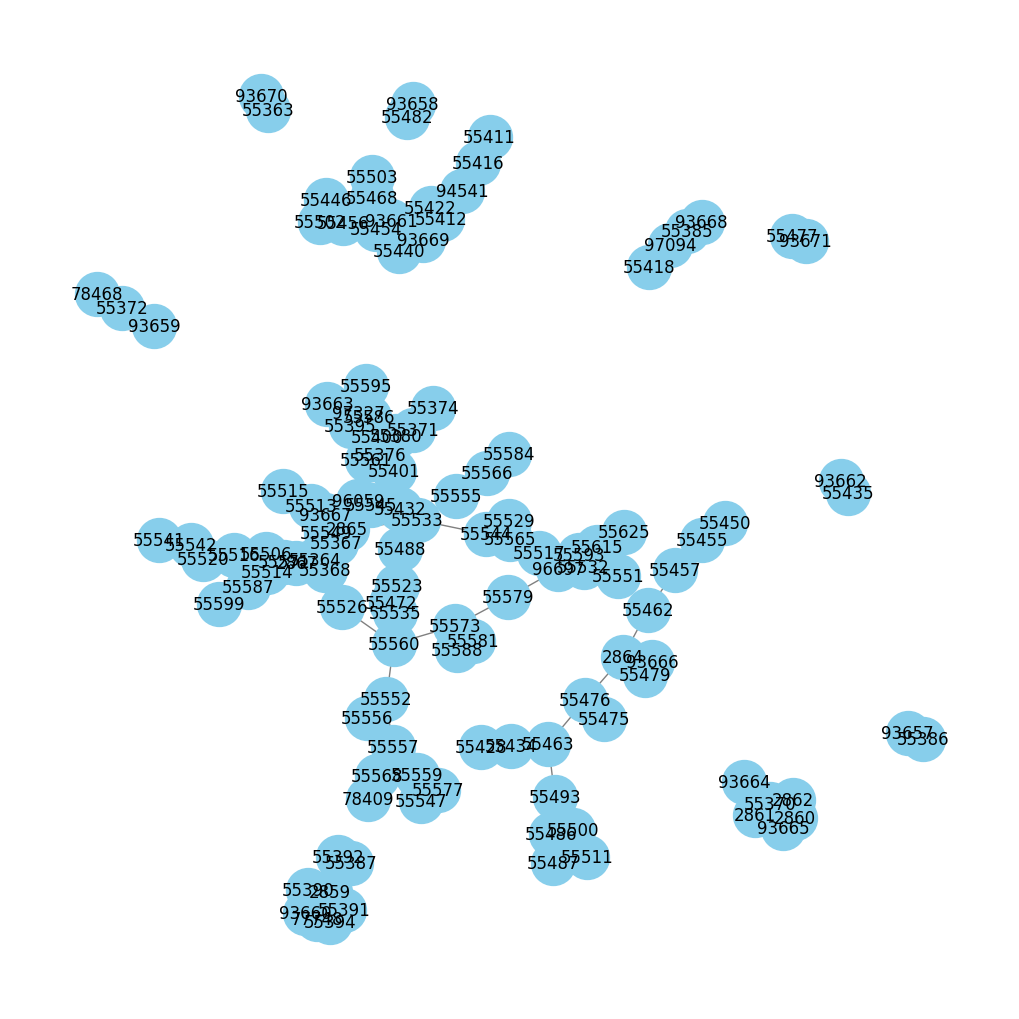

In [126]:
#plot the network

plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", edge_color="grey")
plt.show()


In [135]:
import netgraph as ng
from netgraph import Graph

In [137]:
edge_coords = [((s, e), attrs["coords"]) for s, e, attrs in G.edges(data=True)] 
edge_list = [edge for edge, _ in edge_coords]
edge_paths = dict(edge_coords)
node_positions = nx.get_node_attributes(G, "x_y")

In [139]:
len(node_positions)

112

In [138]:
Graph(edge_list, node_layout=node_positions, edge_layout=edge_paths)
plt.show()

ValueError: node_layout is incomplete. The following elements are missing:
93664
93665
93666
93667
93668
93669
93670
93671
93657
93658
93659
93660
93661
93662
93663